# Importing Packages and files

In [2]:
from Flare_prediction import Load_data
from datetime import datetime
import numpy as np

# Setting a start_time and end_time to perform the prediction

In [3]:
start_time = datetime(2012,2,16,11,9,00)
end_time = datetime(2012,2,22,11,9,00)

# Setting no. of samples

In [3]:
N = 143

# Preparing X & Y Matrices from Image data

In [6]:
X,Y = Load_data(start_time,end_time,N)

# Verifying the size of X & Y

In [7]:
X

(368640, 143)

In [8]:
Y

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

# Performing Logistic Regression on our Image data

In [9]:
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_curve,auc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [12]:
def Perform_Logistic_Regression(X,Y):
    X = X.T
    Y = Y.T
    x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.7)
    logreg = LogisticRegression(fit_intercept=True,solver='liblinear',max_iter=1e6,tol=1e-7)
    logreg.fit(x_train,y_train[:,3])
    predicted_classes = logreg.predict(x_test)
    accuracy = accuracy_score(y_test[:,3],predicted_classes)
    f1 = f1_score(y_test[:,3],predicted_classes)
    print(logreg.coef_)
    print("Accuracy: "+str(accuracy))
    print("F1 Score: "+str(f1))
    cm = confusion_matrix(y_test[:,3],predicted_classes)
    conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Truth:0','Truth:1'])
    plt.figure(figsize = (8,5))
    sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
    plt.show()
    
    probs = logreg.predict_proba(x_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test[:,3], preds)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

[[4.12186863e-09 1.35044866e-07 1.59895560e-08 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
Accuracy: 0.7227722772277227
F1 Score: 0.8292682926829269


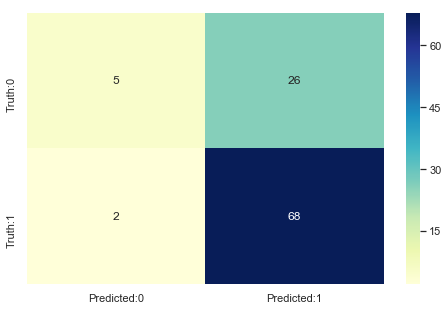

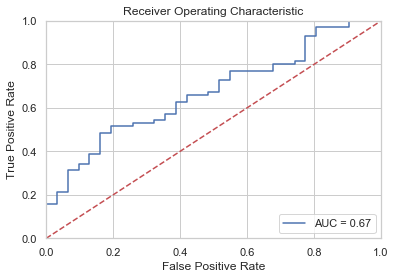

In [22]:
Perform_Logistic_Regression(X,Y)

# Performing Log Lasso Regression on our Image data

In [16]:
def Perform_LogLasso(X,Y):
    X = X.T
    Y = Y.T
    x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.7)
    loglassoreg = LogisticRegression(penalty='l1',solver='liblinear',max_iter=1e6)
    loglassoreg.fit(x_train,y_train[:,3])
    predicted_classes = loglassoreg.predict(x_test)
    accuracy = accuracy_score(y_test[:,3],predicted_classes)
    f1 = f1_score(y_test[:,3],predicted_classes)
    print("Total no. of coefficients: "+str(loglassoreg.coef_.size))
    print("No. of coefficients after applying Log Lasso: "+str(loglassoreg.coef_[np.nonzero(loglassoreg.coef_)].size))
    print("Accuracy: "+str(accuracy))
    print("F1 Score: "+str(f1))
    cm = confusion_matrix(y_test[:,3],predicted_classes)
    conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Truth:0','Truth:1'])
    plt.figure(figsize = (8,5))
    sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
    plt.show()
    
    probs = loglassoreg.predict_proba(x_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test[:,3], preds)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Total no. of coefficients: 368640
No. of coefficients after applying Log Lasso: 941
Accuracy: 0.7623762376237624
F1 Score: 0.8481012658227848


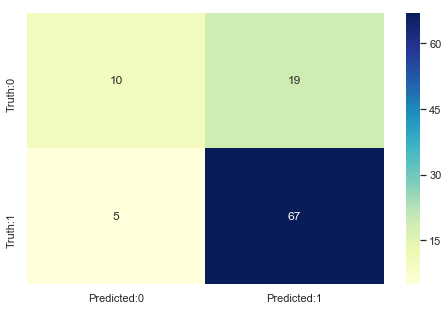

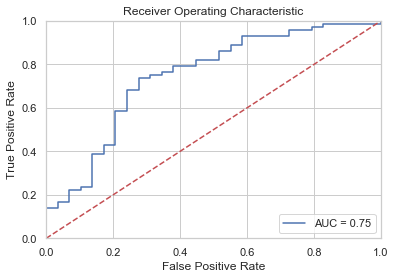

In [25]:
lasso_regressor=Perform_LogLasso(X,Y)